In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Dataset:
In this homework, we will use the California Housing Prices from Kaggle.

The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').

In [2]:
df = pd.read_csv('../data/housing.csv')

In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


##### EDA
- Load the data.
- Look at the median_house_value variable. Does it have a long tail?

In [4]:
df.shape

(20640, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df.median_house_value.describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

<AxesSubplot: xlabel='median_house_value', ylabel='Count'>

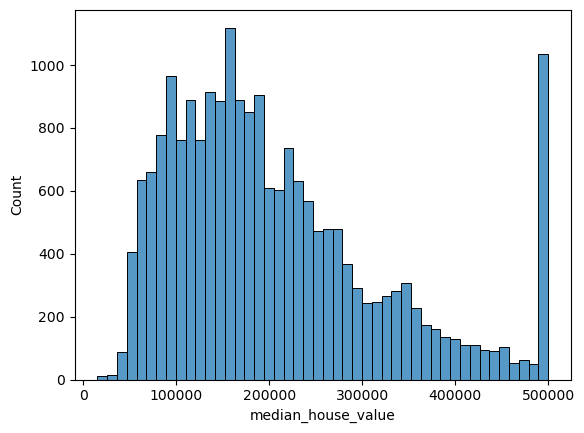

In [8]:
sns.histplot(df.median_house_value)
# Look at the median_house_value variable. Does it have a long tail? >> No

##### Preparing the dataset
For this homework, we only want to use a subset of data.

- First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'

- Next, use only the following columns:

'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value'

In [9]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [10]:
# First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'
df_f = df[(df['ocean_proximity'] == '<1H OCEAN') | (df['ocean_proximity'] == 'INLAND')]
# Next, use only the following columns
df_f = df_f.drop(columns='ocean_proximity')

In [11]:
df.shape, df_f.shape

((20640, 10), (15687, 9))

#### Question 1
There's one feature with missing values. What is it?

- **total_bedrooms**


In [12]:
df_f.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

#### Question 2
What's the median (50% percentile) for variable 'population'?

- **1195**


In [13]:
df_f.population.describe()

count    15687.000000
mean      1466.317205
std       1180.389908
min          3.000000
25%        802.000000
50%       1195.000000
75%       1777.000000
max      35682.000000
Name: population, dtype: float64

In [14]:
df_f.population.median()

1195.0

##### Prepare and split the dataset
- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [15]:
n = len(df_f)
n

15687

In [16]:
# preparation for splitting on index
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
n_train, n_val, n_test

(9413, 3137, 3137)

In [17]:
n, n_val + n_test + n_train

(15687, 15687)

In [18]:
# creating array of index
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 15684, 15685, 15686])

In [19]:
# shuffling
np.random.seed(42)
np.random.shuffle(idx)

In [33]:
idx

array([15183,  4469,  9316, ...,  5390,   860,  7270])

In [20]:
# complete splitting
df_train = df_f.iloc[idx[:n_train]]
df_val = df_f.iloc[idx[n_train:n_train+n_val]]
df_test = df_f.iloc[idx[n_train+n_val:]]

In [21]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19963,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
5929,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
11377,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
6443,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
17546,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0


In [22]:
# reset index for all datasets
df_train.reset_index(drop= True, inplace=True)
df_test.reset_index(drop= True, inplace=True)
df_val.reset_index(drop= True, inplace=True)

In [23]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
1,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
2,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
3,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
4,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0


In [24]:
# creating the y array, we want to predict
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [25]:
y_train

array([11.16196275, 12.32163544, 12.4718963 , ..., 13.12236738,
       12.11888489, 12.52924613])

In [26]:
# drop the columns in all datasets we want to predict
del df_train['median_house_value']
del df_test['median_house_value']
del df_val['median_house_value']

In [27]:
# validation of lenght
len(y_train), len(y_test), len(y_val)

(9413, 3137, 3137)

#### Question 3
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
For computing the mean, use the training only!

- Use the validation dataset to evaluate the models and compare the RMSE of each option.

- Round the RMSE scores to 2 decimal digits using round(score, 2)

Which option gives better RMSE? >> **Both are equally good**

In [28]:
# missing values
print('df_train:', df_train.total_bedrooms.isna().sum())
print('df_test:', df_test.total_bedrooms.isna().sum())
print('df_val:', df_val.total_bedrooms.isna().sum())

df_train: 94
df_test: 34
df_val: 29


### fillna(0)

In [29]:
df_train_zero = df_train.fillna(0)
df_test_zero = df_test.fillna(0)
df_val_zero = df_val.fillna(0)

In [30]:
df_train_zero.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [31]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X) #gram matrix
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [32]:
df_train_zero.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875
1,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125
2,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301
3,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422
4,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306


In [33]:
base = list(df_train_zero.columns)

In [34]:
base

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [35]:
# any transformation, just creating array for model
def prepare_X(df):
    df_num = df[base]
    X = df_num.values
    return X

In [36]:
prepare_X(df_train_zero)

array([[-1.1914e+02,  3.6230e+01,  2.2000e+01, ...,  1.9270e+03,
         5.3000e+02,  2.5875e+00],
       [-1.1779e+02,  3.4120e+01,  1.6000e+01, ...,  1.3190e+03,
         4.4600e+02,  4.8125e+00],
       [-1.1797e+02,  3.3680e+01,  2.6000e+01, ...,  1.9300e+03,
         5.8500e+02,  5.7301e+00],
       ...,
       [-1.1808e+02,  3.4130e+01,  4.6000e+01, ...,  3.7700e+02,
         1.4500e+02,  8.4546e+00],
       [-1.1846e+02,  3.4290e+01,  2.4000e+01, ...,  3.1510e+03,
         8.1000e+02,  3.0526e+00],
       [-1.1841e+02,  3.4000e+01,  1.8000e+01, ...,  8.8400e+02,
         4.5600e+02,  2.9338e+00]])

In [37]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [38]:
#training part
X_train = prepare_X(df_train_zero)
w0, w = train_linear_regression(X_train, y_train)

#validation
X_val = prepare_X(df_val_zero)
y_pred = w0 + X_val.dot(w)

score_zero = round(rmse(y_val, y_pred), 2)
score_zero

# fillna(0) >> 0.3408

0.34

#### fillna(mean)

In [39]:
mean_bedrooms = df_train.total_bedrooms.mean().round(0)

In [40]:
df_train_mean = df_train.fillna(mean_bedrooms)
df_test_mean = df_test.fillna(mean_bedrooms)
df_val_mean = df_val.fillna(mean_bedrooms)

In [41]:
df_train_mean.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [42]:
#training part
X_train = prepare_X(df_train_mean)
w0, w = train_linear_regression(X_train, y_train)

#validation
X_val = prepare_X(df_val_mean)
y_pred = w0 + X_val.dot(w)

score_mean = round(rmse(y_val, y_pred), 2)
score_mean

# fillna(0)    >> 0.3408
# fillna(mean) >> 0.3405

0.34

In [43]:
print('fillna(0)', score_zero)
print('fillna(mean)', score_mean)

fillna(0) 0.34
fillna(mean) 0.34


#### Question 4

> Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.


Which r gives the best RMSE?
(If there are multiple options, select the smallest r.)

Options:

**0**


In [44]:
df_train_zero.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875
1,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125
2,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301
3,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422
4,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306


In [45]:
def train_linear_regression_reg(X, y, r = 0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [46]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:

    #training part
    X_train = prepare_X(df_train_zero)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    #validation
    X_val = prepare_X(df_val_zero)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    
    print(r,'RMSE:', round(score, 2))

0 RMSE: 0.34
1e-06 RMSE: 0.34
0.0001 RMSE: 0.34
0.001 RMSE: 0.34
0.01 RMSE: 0.34
0.1 RMSE: 0.34
1 RMSE: 0.34
5 RMSE: 0.35
10 RMSE: 0.35


#### Question 5

- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))
- What's the value of std?

**0.5**



Note: Standard deviation shows how different the values are. 
If it's low, then all values are approximately the same. If it's high, the values are different. 
If standard deviation of scores is low, then our model is stable.

In [47]:
def train_random_seed(df):
    random_seed = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    result = []
    
    n = len(df) #len of whole dataset

    # preparation for splitting on index
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    # creating array of index
    idx = np.arange(n)
    
    for i in random_seed:
        # shuffling
        np.random.seed(i)
        np.random.shuffle(idx)
        
        # complete splitting
        df_train = df.iloc[idx[:n_train]]
        df_val = df.iloc[idx[n_train:n_train+n_val]]
        df_test = df.iloc[idx[n_train+n_val:]]
        
        # reset index for all datasets
        df_train.reset_index(drop= True, inplace=True)
        df_test.reset_index(drop= True, inplace=True)
        df_val.reset_index(drop= True, inplace=True)
        
        # creating the y array, we want to predict
        y_train = np.log1p(df_train.median_house_value.values)
        y_val = np.log1p(df_val.median_house_value.values)
        y_test = np.log1p(df_test.median_house_value.values)
        
        # drop the columns in all datasets we want to predict
        del df_train['median_house_value']
        del df_test['median_house_value']
        del df_val['median_house_value']
        
        df_train_zero = df_train.fillna(0)
        df_test_zero = df_test.fillna(0)
        df_val_zero = df_val.fillna(0)
        
        #training part
        X_train = prepare_X(df_train_zero)
        w0, w = train_linear_regression(X_train, y_train)

        #validation
        X_val = prepare_X(df_val_zero)
        y_pred = w0 + X_val.dot(w)

        score_zero = round(rmse(y_val, y_pred), 2)
        
        std_dev = np.std(np.array([y_val, y_pred])) 
        std = round(std_dev, 3)

        res = {'seed': i, 'score': score, 'deviation': std}
        result.append(res)
        
    seed_results = pd.DataFrame.from_records(result)
    return seed_results


In [48]:
seed_results = train_random_seed(df_f)

In [49]:
seed_results

,seed,score,deviation
0,0,0.348315,0.504
1,1,0.348315,0.512
2,2,0.348315,0.509
3,3,0.348315,0.508
4,4,0.348315,0.508
5,5,0.348315,0.508
6,6,0.348315,0.501
7,7,0.348315,0.511
8,8,0.348315,0.509
9,9,0.348315,0.520


#### Question 6
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?
Options:


**0.33**


In [50]:
def train_random_seed_nine(df, reg):
    
    n = len(df) #len of whole dataset

    # preparation for splitting on index
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    # creating array of index
    idx = np.arange(n)
    
    # shuffling
    np.random.seed(9)
    np.random.shuffle(idx)

    # complete splitting
    df_train = df_f.iloc[idx[:n_train]]
    df_val = df_f.iloc[idx[n_train:n_train+n_val]]
    df_test = df_f.iloc[idx[n_train+n_val:]]

    # reset index for all datasets
    df_train.reset_index(drop= True, inplace=True)
    df_test.reset_index(drop= True, inplace=True)
    df_val.reset_index(drop= True, inplace=True)

    # creating the y array, we want to predict
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    # drop the columns in all datasets we want to predict
    del df_train['median_house_value']
    del df_test['median_house_value']
    del df_val['median_house_value']

    df_train_zero = df_train.fillna(0)
    df_test_zero = df_test.fillna(0)
    df_val_zero = df_val.fillna(0)
    
    df_full_train = pd.concat([df_train_zero, df_val_zero])
    df_full_train = df_full_train.reset_index(drop=True)
    y_full_train = np.concatenate([y_train, y_val])

    #training part
    X_train = prepare_X(df_full_train)
    w0, w = train_linear_regression_reg(X_train, y_full_train, r=reg)

    #validation
    X_test = prepare_X(df_test_zero)
    y_pred = w0 + X_test.dot(w)

    score = round(rmse(y_test, y_pred), 2)

    #std_dev = np.std(np.array([y_val, y_pred])) 
    #std = round(std_dev, 3)


    return score 


In [51]:
train_random_seed_nine(df_f, 0.001)

0.33